<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Machine-Learning/blob/master/4_4_Supervised_Learning_Ensembles_of_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ensembles of Decision Trees**

Ensembles are methods that combine multiple machine learning models to create more powerful models. There are many models in the machine learning literature that belong to this category, but there are two ensemble models that have proven to be effective on a wide range of datasets for classification and regression, both of which use decision trees as their building blocks: random forests and gradient boosted decision trees.

**Random forests**

As we just observed, a main drawback of decision trees is that they tend to overfit the training data. Random forests are one way to address this problem. A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees, can be shown using rigorous mathematics.

To implement this strategy, we need to build many decision trees. Each tree should do an acceptable job of predicting the target, and should also be different from the other trees. Random forests get their name from injecting randomness into the tree building to ensure each tree is different. There are two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by selecting the features in each split test.

**Building a Randon forest**

To build a random forest model, you need to decide on the number of trees to build (the **n_estimators** parameter of RandomForestRegressor or RandomForestClassifier). Let’s say we want to build 10 trees. These trees will be built completely independently from each other, and the algorithm will make different random choices for each tree to make sure the trees are distinct. To build a tree, we first take what is called a **bootstrap sample** of our data. That is, from our n_samples data points, we repeatedly draw an example randomly with replacement (meaning the same sample can be picked multiple times), n_samples times. This will create a dataset that is as big as the original dataset, but some data points will be missing from it (approximately one third), and some will be repeated.

To illustrate, let’s say we want to create a bootstrap sample of the list ['a', 'b', 'c', 'd']. A possible bootstrap sample would be ['b', 'd', 'd', 'c']. Another possible sample would be ['d', 'a', 'd', 'a'].

Next, a decision tree is built based on this newly created dataset. However, the algorithm we described for the decision tree is slightly modified. Instead of looking for the best test for each node, in each node the algorithm randomly selects a subset of the features, and it looks for the best possible test involving one of these features. The number of features that are selected is controlled by the **max_features** parameter. This selection of a subset of features is repeated separately in each node, so that each node in a tree can make a decision using a different subset of the features.


The bootstrap sampling leads to each decision tree in the random forest being built on a slightly different dataset. Because of the selection of features in each node, each split in each tree operates on a different subset of features. Together, these two mechanisms ensure that all the trees in the random forest are different.

A critical parameter in this process is max_features. If we set max_features to n_features, that means that each split can look at all features in the dataset, and no randomness will be injected in the feature selection (the randomness due to the bootstrapping remains, though). If we set max_features to 1, that means that the splits have no choice at all on which feature to test, and can only search over different thresholds for the feature that was selected randomly. Therefore, a high max_features means that the trees in the random forest will be quite similar, and they will be able to fit the data easily, using the most distinctive features. A low max_features means that the trees in the random forest will be quite different, and that each tree might need to be very deep in order to fit the data well.

To make a prediction using the random forest, the algorithm first makes a prediction for every tree in the forest. For regression, we can average these results to get our final prediction. For classification, a “soft voting” strategy is used. This means each algorithm makes a “soft” prediction, providing a probability for each possible output label. The probabilities predicted by all the trees are averaged, and the class with the highest probability is predicted.

**Step 1 - Loading the data**

In [0]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

**Step 2 - Train-Test Split**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

**Step 3 - Building the Model**

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=2)

**Step 4 - Training the model**

In [6]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [8]:
print("Test set prediction {}".format(forest.predict(X_test)))

Test set prediction [1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1]


**Step 6 - Evaluating the model**

In [10]:
print("Train set accuracy : {}".format(forest.score(X_train, y_train)))
print("Test set accuracy : {}".format(forest.score(X_test, y_test)))

Train set accuracy : 0.96
Test set accuracy : 0.96


The trees that are built as part of the random forest are stored in the estimator_ attribute. Let’s visualize the decision boundaries learned by each tree, together with their aggregate prediction as made by the forest

In [11]:
!pip install mglearn

     |████████████████████████████████| 542kB 1.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=c1f0313177330b0c4b4b630d332dba76a6e96cdf8d00678afeb31f7f86c361fd
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


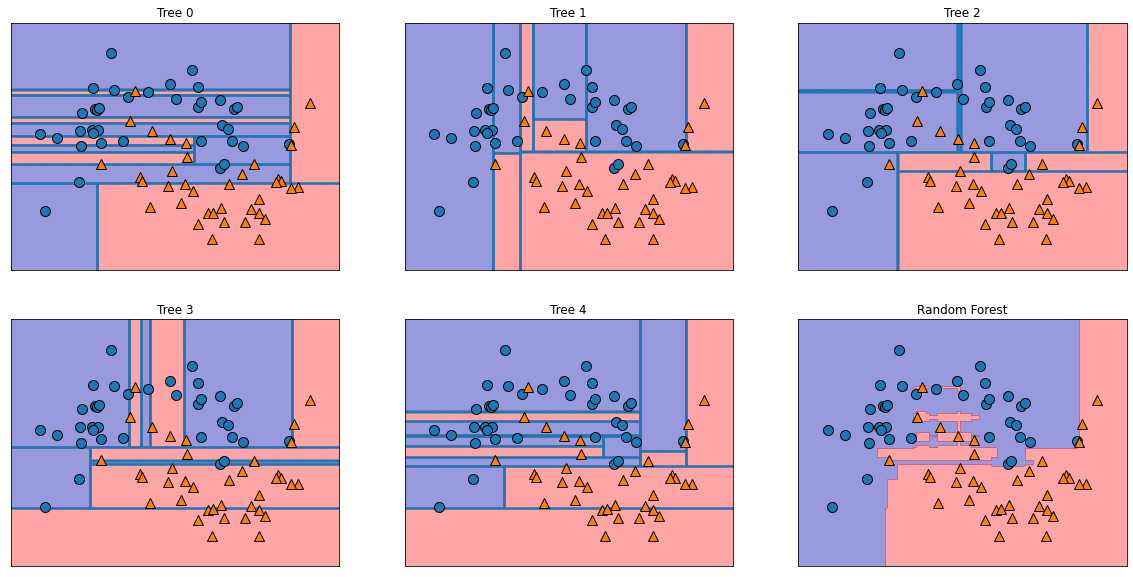

In [13]:
import mglearn
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i)) 
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest") 
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

As another example, let’s apply a random forest consisting of 100 trees on the Breast Cancer dataset:

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


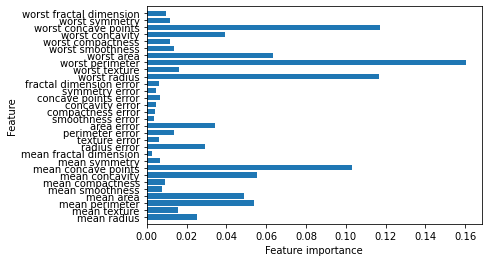

In [19]:
import numpy as np
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center') 
  plt.yticks(np.arange(n_features), cancer.feature_names) 
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)
plot_feature_importances_cancer(forest)

As you can see, the random forest gives nonzero importance to many more features than the single tree. Similarly to the single decision tree, the random forest also gives a lot of importance to the “worst radius” feature, but it actually chooses “worst perimeter” to be the most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.

**Strengths, weaknesses, and parameters**

Random forests for regression and classifica‐ tion are currently among the most widely used machine learning methods. They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

Essentially, random forests share all of the benefits of decision trees, while making up for some of their deficiencies. One reason to still use decision trees is if you need a compact representation of the decision-making process. It is basically impossible to interpret tens or hundreds of trees in detail, and trees in random forests tend to be deeper than decision trees (because of the use of feature subsets). Therefore, if you need to summarize the prediction making in a visual way to nonexperts, a single decision tree might be a better choice. While building random forests on large datasets might be somewhat time consuming, it can be parallelized across multiple CPU cores within a computer easily. If you are using a multi-core processor (as nearly all modern computers do), you can use the n_jobs parameter to adjust the number of cores to use. Using more CPU cores will result in linear speed-ups (using two cores, the training of the random forest will be twice as fast), but specifying n_jobs larger than the number of cores will not help. You can set n_jobs=-1 to use all the cores in your computer.

You should keep in mind that random forests, by their nature, are random, and setting different random states (or not setting the random_state at all) can drastically change the model that is built. The more trees there are in the forest, the more robust it will be against the choice of random state. If you want to have reproducible results, it is important to fix the random_state.

Random forests don’t tend to perform well on very high dimensional, sparse data, such as text data. For this kind of data, linear models might be more appropriate. Random forests usually work well even on very large datasets, and training can easily be parallelized over many CPU cores within a powerful computer. However, random forests require more memory and are slower to train and to predict than linear models. If time and memory are important in an application, it might make sense to use a linear model instead.

The important parameters to adjust are n_estimators, max_features, and possibly pre-pruning options like max_depth. For n_estimators, larger is always better. Averaging more trees will yield a more robust ensemble by reducing overfitting. However, there are diminishing returns, and more trees need more memory and more time to train. A common rule of thumb is to build “as many as you have time/memory for.”

As described earlier, max_features determines how random each tree is, and a smaller max_features reduces overfitting. In general, it’s a good rule of thumb to use the default values: max_features=sqrt(n_features) for classification and max_fea tures=n_features for regression. Adding max_features or max_leaf_nodes might sometimes improve performance. It can also drastically reduce space and time requirements for training and prediction.


**Gradient boosted regression trees (gradient boosting machines)**

The gradient boosted regression tree is another ensemble method that combines multiple decision trees to create a more powerful model. Despite the “regression” in the name, these models can be used for regression and classification. In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one. By default, there is no randomization in gradient boosted regression trees; instead, strong pre-pruning is used. Gradient boosted trees often use very shallow trees, of depth one to five, which makes the model smaller in terms of memory and makes predictions faster.

The main idea behind gradient boosting is to combine many simple models (in this context known as weak learners), like shallow trees. Each tree can only provide good predictions on part of the data, and so more and more trees are added to iteratively improve performance.

Gradient boosted trees are frequently the winning entries in machine learning com‐ petitions, and are widely used in industry. They are generally a bit more sensitive to parameter settings than random forests, but can provide better accuracy if the parameters are set correctly.

Apart from the pre-pruning and the number of trees in the ensemble, another important parameter of gradient boosting is the learning_rate, which controls how strongly each tree tries to correct the mistakes of the previous trees. A higher learning rate means each tree can make stronger corrections, allowing for more complex models. Adding more trees to the ensemble, which can be accomplished by increasing n_estimators, also increases the model complexity, as the model has more chances to correct mistakes on the training set.

In [3]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0) 
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [4]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1) 
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [5]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01) 
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.965


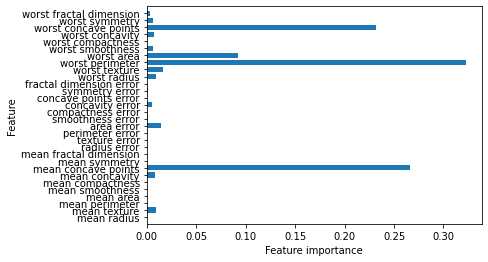

In [8]:
import numpy as np
import matplotlib.pyplot as plt

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1) 
gbrt.fit(X_train, y_train)

def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center') 
  plt.yticks(np.arange(n_features), cancer.feature_names) 
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)
plot_feature_importances_cancer(gbrt)

As both gradient boosting and random forests perform well on similar kinds of data, a common approach is to first try random forests, which work quite robustly. If random forests work well but prediction time is at a premium, or it is important to squeeze out the last percentage of accuracy from the machine learning model, moving to gradient boosting often helps.

**Strengths, weaknesses, and parameters**

Gradient boosted decision trees are among the most powerful and widely used models for supervised learning. Their main drawback is that they require careful tuning of the parameters and may take a long time to train. Similarly to other tree-based models, the algorithm works well without scaling and on a mixture of binary and continuous features. As with other tree-based models, it also often does not work well on high-dimensional sparse data.

The main parameters of gradient boosted tree models are the number of trees, n_estimators, and the learning_rate, which controls the degree to which each tree is allowed to correct the mistakes of the previous trees. These two parameters are highly interconnected, as a lower learning_rate means that more trees are needed to build a model of similar complexity. In contrast to random forests, where a higher n_estimators value is always better, increasing n_estimators in gradient boosting leads to a more complex model, which may lead to overfitting. A common practice is to fit n_estimators depending on the time and memory budget, and then search over different learning_rates. Another important parameter is max_depth (or alternatively max_leaf_nodes), to reduce the complexity of each tree. Usually max_depth is set very low for gradient boosted models, often not deeper than five splits.